In [ ]:
%run data_preprocessing.ipynb

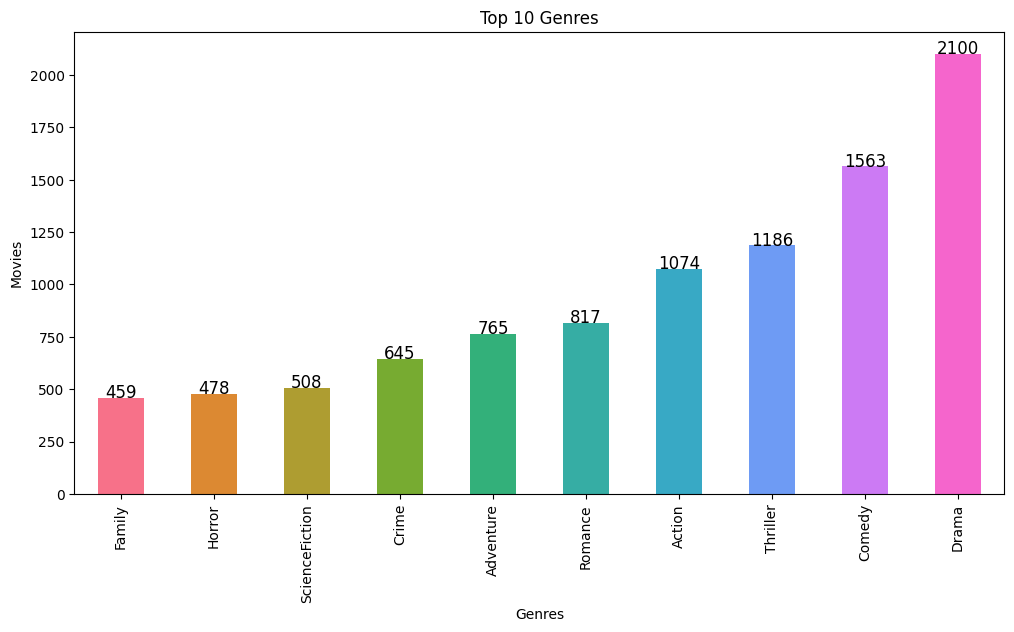

In [4]:
#Visualize
import seaborn as sns

#df for visualizations
movies_visual = movies.dropna()

#remove quotes from genres values
movies_visual['genres'] = movies_visual['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_visual['genres'] = movies_visual['genres'].str.split(',')

#bar plot of genres
plt.subplots(figsize=(12, 6))
list1 = []

for i in movies_visual['genres']:
    list1.extend(i)

#bar colors
ax = pd.Series(list1).value_counts()[:10].sort_values().plot.bar(width=0.5, color=sns.color_palette('husl', 10))

#annotations
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values().values):
    ax.text(i, v + 0.1, str(v), fontsize=12, color='black', ha='center')

#labels and title
plt.xlabel('Genres')
plt.ylabel('Movies')
plt.title('Top 10 Genres')

plt.show()

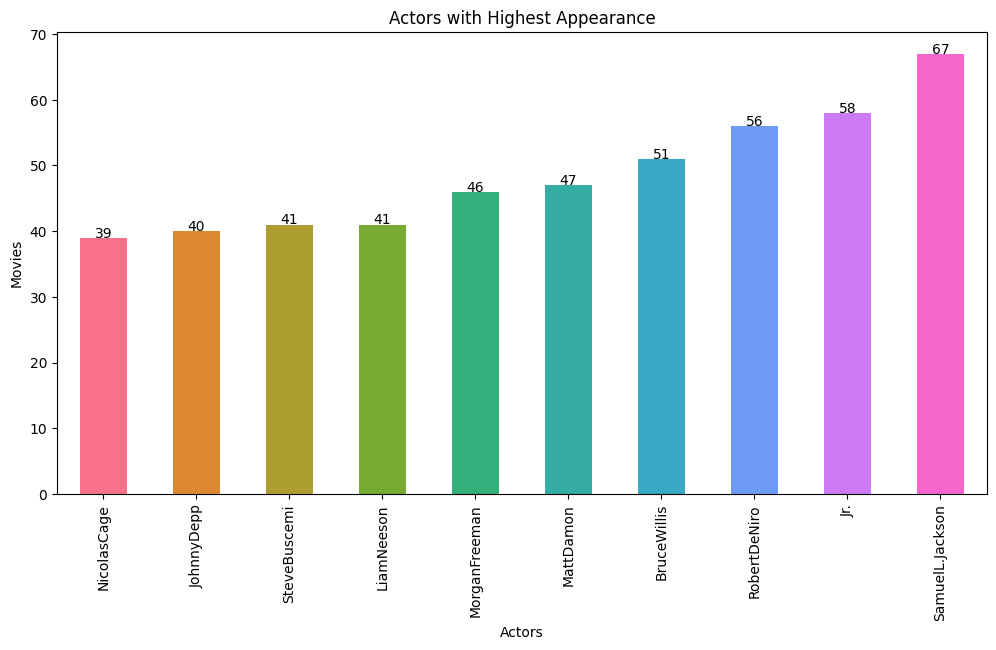

In [5]:
#remove quotes and spaces from cast
movies_visual['cast'] = movies_visual['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies_visual['cast'] = movies_visual['cast'].str.split(',')

#top actors bar chart
plt.subplots(figsize=(12, 6))
list1 = []

for i in movies_visual['cast']:
    list1.extend(i)

# Use different colors from the 'husl' color palette
ax = pd.Series(list1).value_counts()[:10].sort_values().plot.bar(width=0.5, color=sns.color_palette('husl', 10))

# Add annotations
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values().values):
    ax.text(i, v + 0.1, str(v), fontsize=10, color='black', ha='center')

# Set labels and title
plt.xlabel('Actors')
plt.ylabel('Movies')
plt.title('Actors with Highest Appearance')

plt.show()

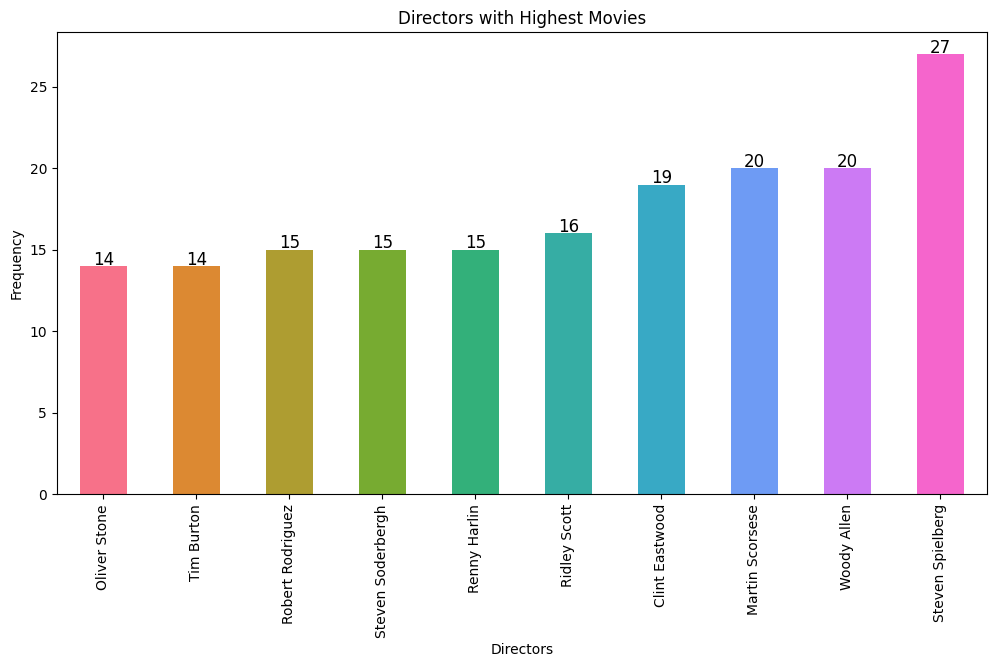

In [6]:
#directors chart
plt.subplots(figsize=(12, 6))

# Filter out rows where director is an empty string
filtered_directors = movies_visual[movies_visual['director'] != '']

ax = filtered_directors['director'].value_counts()[:10].sort_values().plot.bar(width=0.5, color=sns.color_palette('husl', 10))

# Add annotations
for i, v in enumerate(filtered_directors['director'].value_counts()[:10].sort_values().values):
    ax.text(i, v + 0.1, str(v), fontsize=12, color='black', ha='center')

# Set labels and title
plt.xlabel('Directors')
plt.ylabel('Frequency')
plt.title('Directors with Highest Movies')

plt.show()

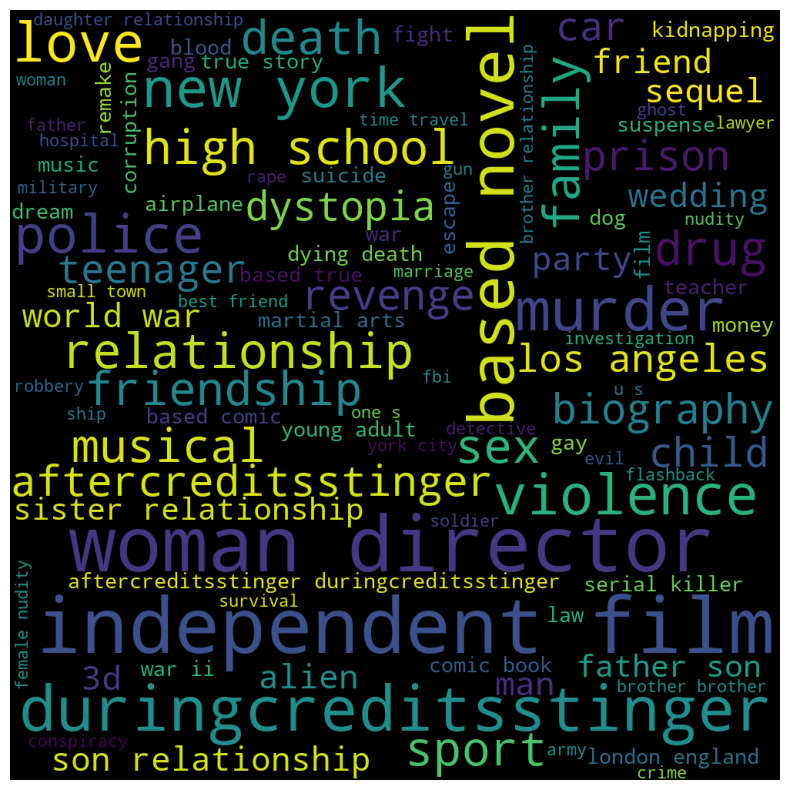

In [7]:
#plotting a word cloud

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=movies_visual['keywords'].dropna().apply(nltk.word_tokenize)

word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=100, stopwords=STOPWORDS, max_font_size= 100,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()